In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split

cwd = os.getcwd()
df = pd.read_csv(cwd + "/data_csv/preprocessing_data.csv")

emo_feature = []
emo_target = []

for i in range(len(df['emotion'])):
    if df['emotion'][i] == 1:
        emo_target.append(1)
    else:
        emo_target.append(0)
        
    emo_feature.append([df['mouth_distance'][i], df['average_distance'][i]])

emo_feature = np.array(emo_feature)
emo_target = np.array(emo_target)

# import data
X = emo_feature
y = emo_target

# Add noisy features
random_state = np.random.RandomState(0)

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=random_state)

====================Fold 0==================== 

accuracy_score : 0.7161066048667439
log_loss : 0.5615700033567111

====================Fold 1==================== 

accuracy_score : 0.7508690614136733
log_loss : 0.5211560199697731

====================Fold 2==================== 

accuracy_score : 0.7670915411355735
log_loss : 0.5220030912041937

====================Fold 3==================== 

accuracy_score : 0.7439165701042874
log_loss : 0.5496425789777171

====================Fold 4==================== 

accuracy_score : 0.7300115874855156
log_loss : 0.5507187417299759



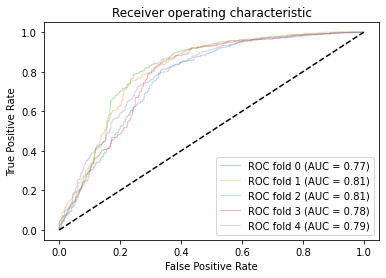

accuracy : 0.75


In [2]:
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

# create model
clf = svm.SVC(kernel='linear', C=1, probability=True)

history = []
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5, shuffle=True)
for i, (train, val) in enumerate(cv.split(X_train, y_train)):
    X_train, X_val = X[train], X[val]
    y_train, y_val = y[train], y[val]

    # Fit model
    clf.fit(X_train, y_train)

    # Predict
    predict = clf.predict(X_val)
    clf_probs = clf.predict_proba(X_val)

    # Store model report in history list
    history.append(classification_report(y_val, predict))

    # Get loss and accuracy
    acc = accuracy_score(y_val, predict)
    loss = log_loss(y_val, clf_probs)
    print(f'====================Fold {i}====================', '\n')
    print(f"accuracy_score : {acc}")
    print(f"log_loss : {loss}\n")

    viz = RocCurveDisplay.from_estimator(clf, X_val, y_val, name="ROC fold {}".format(i), alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

# middle line
ax.plot([0, 1], [0, 1], 'k--')

'''
# mean line
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.4f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

# std
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)'''

ax.set(xlim=[-0.05, 1.05],
        ylim=[-0.05, 1.05],
        title="Receiver operating characteristic")

ax.legend(loc="lower right")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.savefig('graph\\1_svm_linear.jpg')
plt.show()

# for i in range(len(history)):
    # print(f'=========================Fold {i+1}=========================')
    # print(history[i])

predict = clf.predict(X_test)
print(f"accuracy : {accuracy_score(y_test, predict)}")

====================Fold 1==================== 

accuracy_score : 0.743849493487699
log_loss : 0.5290194207677449

====================Fold 2==================== 

accuracy_score : 0.7178002894356006
log_loss : 0.5632681199754418

====================Fold 3==================== 

accuracy_score : 0.7594202898550725
log_loss : 0.5297050777517911

====================Fold 4==================== 

accuracy_score : 0.7318840579710145
log_loss : 0.535979774704499

====================Fold 5==================== 

accuracy_score : 0.7579710144927536
log_loss : 0.5214315602154694



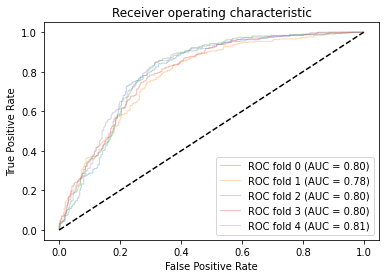

accuracy : 0.75


In [3]:
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

# create model
clf = svm.SVC(kernel='poly', C=1, probability=True)

history = []
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5, shuffle=True)
for i, (train, val) in enumerate(cv.split(X_train, y_train)):
    X_train, X_val = X[train], X[val]
    y_train, y_val = y[train], y[val]

    # Fit model
    clf.fit(X_train, y_train)

    # Predict
    predict = clf.predict(X_val)
    clf_probs = clf.predict_proba(X_val)

    # Store model report in history list
    history.append(classification_report(y_val, predict))

    # Get loss and accuracy
    acc = accuracy_score(y_val, predict)
    loss = log_loss(y_val, clf_probs)
    print(f'====================Fold {i+1}====================', '\n')
    print(f"accuracy_score : {acc}")
    print(f"log_loss : {loss}\n")

    viz = RocCurveDisplay.from_estimator(clf, X_val, y_val, name="ROC fold {}".format(i), alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

# middle line
ax.plot([0, 1], [0, 1], 'k--')

'''
# mean line
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.4f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

# std
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)'''

ax.set(xlim=[-0.05, 1.05],
        ylim=[-0.05, 1.05],
        title="Receiver operating characteristic")

ax.legend(loc="lower right")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.savefig('graph\\1_svm_poly.jpg')
plt.show()

# for i in range(len(history)):
    # print(f'=========================Fold {i+1}=========================')
    # print(history[i])
    
predict = clf.predict(X_test)
print(f"accuracy : {accuracy_score(y_test, predict)}")

====================Fold 1==================== 

accuracy_score : 0.7432188065099458
log_loss : 0.5314775722322067

====================Fold 2==================== 

accuracy_score : 0.7504520795660036
log_loss : 0.5238090229615145

====================Fold 3==================== 

accuracy_score : 0.7554347826086957
log_loss : 0.5389696910296814

====================Fold 4==================== 

accuracy_score : 0.7155797101449275
log_loss : 0.5736076359475812

====================Fold 5==================== 

accuracy_score : 0.7753623188405797
log_loss : 0.5234113434433808



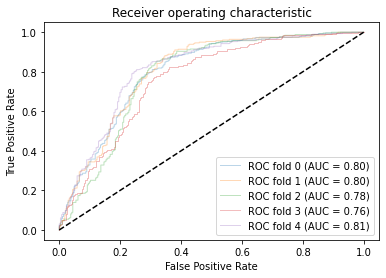

accuracy : 0.7541666666666667


In [4]:
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

# create model
clf = svm.SVC(kernel='rbf', C=1, probability=True)

history = []
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5, shuffle=True)
for i, (train, val) in enumerate(cv.split(X_train, y_train)):
    X_train, X_val = X[train], X[val]
    y_train, y_val = y[train], y[val]

    # Fit model
    clf.fit(X_train, y_train)

    # Predict
    predict = clf.predict(X_val)
    clf_probs = clf.predict_proba(X_val)

    # Store model report in history list
    history.append(classification_report(y_val, predict))

    # Get loss and accuracy
    acc = accuracy_score(y_val, predict)
    loss = log_loss(y_val, clf_probs)
    print(f'====================Fold {i+1}====================', '\n')
    print(f"accuracy_score : {acc}")
    print(f"log_loss : {loss}\n")

    viz = RocCurveDisplay.from_estimator(clf, X_val, y_val, name="ROC fold {}".format(i), alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

# middle line
ax.plot([0, 1], [0, 1], 'k--')

'''
# mean line
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.4f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

# std
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)'''

ax.set(xlim=[-0.05, 1.05],
        ylim=[-0.05, 1.05],
        title="Receiver operating characteristic")

ax.legend(loc="lower right")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.savefig('graph\\1_svm_rbf.jpg')

plt.show()

# for i in range(len(history)):
    # print(f'=========================Fold {i+1}=========================')
    # print(history[i])

predict = clf.predict(X_test)
print(f"accuracy : {accuracy_score(y_test, predict)}")

====================Fold 1==================== 

accuracy_score : 0.753393665158371
log_loss : 0.5169183631216662

====================Fold 2==================== 

accuracy_score : 0.7081447963800905
log_loss : 0.5690634408975973

====================Fold 3==================== 

accuracy_score : 0.751131221719457
log_loss : 0.5440725758960377

====================Fold 4==================== 

accuracy_score : 0.7624434389140271
log_loss : 0.5373464022945449

====================Fold 5==================== 

accuracy_score : 0.7895927601809954
log_loss : 0.4953198884320868



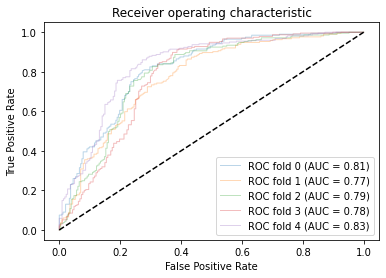

accuracy : 0.75


In [5]:
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

# create model
clf = svm.SVC(probability=True)

history = []
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5, shuffle=True)
for i, (train, val) in enumerate(cv.split(X_train, y_train)):
    X_train, X_val = X[train], X[val]
    y_train, y_val = y[train], y[val]

    # Fit model
    clf.fit(X_train, y_train)

    # Predict
    predict = clf.predict(X_val)
    clf_probs = clf.predict_proba(X_val)

    # Store model report in history list
    history.append(classification_report(y_val, predict))

    # Get loss and accuracy
    acc = accuracy_score(y_val, predict)
    loss = log_loss(y_val, clf_probs)
    print(f'====================Fold {i+1}====================', '\n')
    print(f"accuracy_score : {acc}")
    print(f"log_loss : {loss}\n")

    viz = RocCurveDisplay.from_estimator(clf, X_val, y_val, name="ROC fold {}".format(i), alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

# middle line
ax.plot([0, 1], [0, 1], 'k--')

'''
# mean line
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.4f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

# std
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)'''

ax.set(xlim=[-0.05, 1.05],
        ylim=[-0.05, 1.05],
        title="Receiver operating characteristic")

ax.legend(loc="lower right")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.savefig('graph\\1_svm.jpg')

plt.show()

# for i in range(len(history)):
    # print(f'=========================Fold {i+1}=========================')
    # print(history[i])

predict = clf.predict(X_test)
print(f"accuracy : {accuracy_score(y_test, predict)}")

====================Fold 1==================== 

accuracy_score : 0.7203389830508474
log_loss : 0.5402668727303664

====================Fold 2==================== 

accuracy_score : 0.7401129943502824
log_loss : 0.5357128917875689

====================Fold 3==================== 

accuracy_score : 0.7853107344632768
log_loss : 0.48415698046882644

====================Fold 4==================== 

accuracy_score : 0.7393767705382436
log_loss : 0.5705071372788795

====================Fold 5==================== 

accuracy_score : 0.7535410764872521
log_loss : 0.5537239308305282



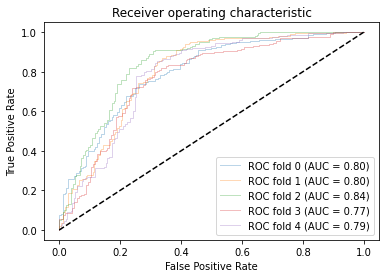

accuracy : 0.7479166666666667


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

# create model
clf = LogisticRegression()

history = []
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5, shuffle=True)
for i, (train, val) in enumerate(cv.split(X_train, y_train)):
    X_train, X_val = X[train], X[val]
    y_train, y_val = y[train], y[val]

    # Fit model
    clf.fit(X_train, y_train)

    # Predict
    predict = clf.predict(X_val)
    clf_probs = clf.predict_proba(X_val)

    # Store model report in history list
    history.append(classification_report(y_val, predict))

    # Get loss and accuracy
    acc = accuracy_score(y_val, predict)
    loss = log_loss(y_val, clf_probs)
    print(f'====================Fold {i+1}====================', '\n')
    print(f"accuracy_score : {acc}")
    print(f"log_loss : {loss}\n")

    viz = RocCurveDisplay.from_estimator(clf, X_val, y_val, name="ROC fold {}".format(i), alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

# middle line
ax.plot([0, 1], [0, 1], 'k--')

'''
# mean line
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.4f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

# std
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)'''

ax.set(xlim=[-0.05, 1.05],
        ylim=[-0.05, 1.05],
        title="Receiver operating characteristic")

ax.legend(loc="lower right")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.savefig('graph\\1_logreg.jpg')
plt.show()

# for i in range(len(history)):
    # print(f'=========================Fold {i+1}=========================')
    # print(history[i])

predict = clf.predict(X_test)
print(f"accuracy : {accuracy_score(y_test, predict)}")

====================Fold 1==================== 

accuracy_score : 0.6819787985865724
log_loss : 0.750560557158396

====================Fold 2==================== 

accuracy_score : 0.696113074204947
log_loss : 1.120873564382723

====================Fold 3==================== 

accuracy_score : 0.6784452296819788
log_loss : 1.5974804317439364

====================Fold 4==================== 

accuracy_score : 0.7102473498233216
log_loss : 1.4030570807060887

====================Fold 5==================== 

accuracy_score : 0.6890459363957597
log_loss : 1.4146212331986514



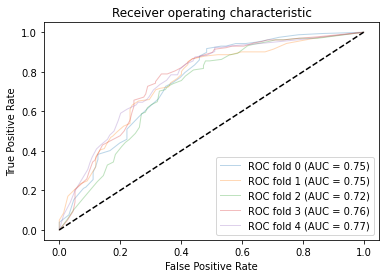

accuracy : 0.7770833333333333


In [7]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# create model
clf = RandomForestClassifier(n_estimators=40)

history = []
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5, shuffle=True)
for i, (train, val) in enumerate(cv.split(X_train, y_train)):
    X_train, X_val = X[train], X[val]
    y_train, y_val = y[train], y[val]

    # Fit model
    clf.fit(X_train, y_train)

    # Predict
    predict = clf.predict(X_val)
    clf_probs = clf.predict_proba(X_val)

    # Store model report in history list
    history.append(classification_report(y_val, predict))

    # Get loss and accuracy
    acc = accuracy_score(y_val, predict)
    loss = log_loss(y_val, clf_probs)
    print(f'====================Fold {i+1}====================', '\n')
    print(f"accuracy_score : {acc}")
    print(f"log_loss : {loss}\n")

    viz = RocCurveDisplay.from_estimator(clf, X_val, y_val, name="ROC fold {}".format(i), alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

# middle line
ax.plot([0, 1], [0, 1], 'k--')

'''
# mean line
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.4f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

# std
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)'''

ax.set(xlim=[-0.05, 1.05],
        ylim=[-0.05, 1.05],
        title="Receiver operating characteristic")

ax.legend(loc="lower right")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.savefig('graph\\1_rf.jpg')

plt.show()

# for i in range(len(history)):
    # print(f'=========================Fold {i+1}=========================')
    # print(history[i])

predict = clf.predict(X_test)
print(f"accuracy : {accuracy_score(y_test, predict)}")

====================Fold 1==================== 

accuracy_score : 0.7444933920704846
log_loss : 0.5231491127526396

====================Fold 2==================== 

accuracy_score : 0.7092511013215859
log_loss : 0.6636193258346982

====================Fold 3==================== 

accuracy_score : 0.7654867256637168
log_loss : 0.5135492896221462

====================Fold 4==================== 

accuracy_score : 0.7433628318584071
log_loss : 0.5756251823074617

====================Fold 5==================== 

accuracy_score : 0.7345132743362832
log_loss : 0.5552383862934355



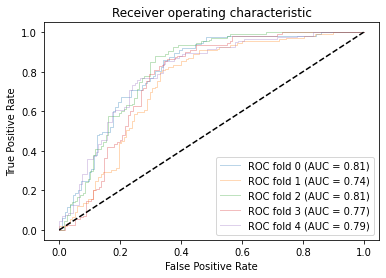

accuracy : 0.7354166666666667


In [8]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

# create model
clf = GaussianNB()

history = []
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5, shuffle=True)
for i, (train, val) in enumerate(cv.split(X_train, y_train)):
    X_train, X_val = X[train], X[val]
    y_train, y_val = y[train], y[val]

    # Fit model
    clf.fit(X_train, y_train)

    # Predict
    predict = clf.predict(X_val)
    clf_probs = clf.predict_proba(X_val)

    # Store model report in history list
    history.append(classification_report(y_val, predict))

    # Get loss and accuracy
    acc = accuracy_score(y_val, predict)
    loss = log_loss(y_val, clf_probs)
    print(f'====================Fold {i+1}====================', '\n')
    print(f"accuracy_score : {acc}")
    print(f"log_loss : {loss}\n")

    viz = RocCurveDisplay.from_estimator(clf, X_val, y_val, name="ROC fold {}".format(i), alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

# middle line
ax.plot([0, 1], [0, 1], 'k--')

'''
# mean line
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.4f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

# std
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)'''

ax.set(xlim=[-0.05, 1.05],
        ylim=[-0.05, 1.05],
        title="Receiver operating characteristic")

ax.legend(loc="lower right")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.savefig('graph\\1_nb.jpg')

plt.show()

# for i in range(len(history)):
    # print(f'=========================Fold {i+1}=========================')
    # print(history[i])
    
predict = clf.predict(X_test)
print(f"accuracy : {accuracy_score(y_test, predict)}")

'\nfor i, (train, val) in enumerate(cv.split(X_train, y_train)):\n    X_train, X_val = X[train], X[val]\n    y_train, y_val = y[train], y[val]\n\n    # Fit model\n    clf.fit(X_train, y_train)\n\n    # Predict\n    predict = clf.predict(X_val)\n    # clf_probs = clf.predict_proba(X_val)\n\n    # Store model report in history list\n    history.append(classification_report(y_val, predict))\n\n    # Get loss and accuracy\n    acc = accuracy_score(y_val, predict)\n    loss = log_loss(y_val, clf_probs)\n    print(f\'====================Fold {i+1}====================\', \'\n\')\n    print(f"accuracy_score : {acc}")\n    print(f"log_loss : {loss}\n")\n\n    viz = RocCurveDisplay.from_estimator(clf, X_val, y_val, name="ROC fold {}".format(i), alpha=0.3, lw=1, ax=ax)\n    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)\n    interp_tpr[0] = 0.0\n    tprs.append(interp_tpr)\n    aucs.append(viz.roc_auc)\n\n# middle line\nax.plot([0, 1], [0, 1], \'k--\')\n\n\n# mean line\nmean_tpr = np.mean(tpr

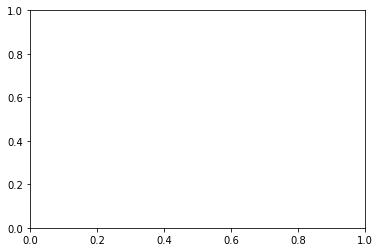

In [9]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# create model
clf = LinearRegression()

history = []
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5, shuffle=True)
'''
for i, (train, val) in enumerate(cv.split(X_train, y_train)):
    X_train, X_val = X[train], X[val]
    y_train, y_val = y[train], y[val]

    # Fit model
    clf.fit(X_train, y_train)

    # Predict
    predict = clf.predict(X_val)
    # clf_probs = clf.predict_proba(X_val)

    # Store model report in history list
    history.append(classification_report(y_val, predict))

    # Get loss and accuracy
    acc = accuracy_score(y_val, predict)
    loss = log_loss(y_val, clf_probs)
    print(f'====================Fold {i+1}====================', '\n')
    print(f"accuracy_score : {acc}")
    print(f"log_loss : {loss}\n")

    viz = RocCurveDisplay.from_estimator(clf, X_val, y_val, name="ROC fold {}".format(i), alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

# middle line
ax.plot([0, 1], [0, 1], 'k--')


# mean line
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.4f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

# std
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(xlim=[-0.05, 1.05],
        ylim=[-0.05, 1.05],
        title="Receiver operating characteristic")

ax.legend(loc="lower right")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.savefig('graph\\1_linreg.jpg')

plt.show()

# for i in range(len(history)):
    # print(f'=========================Fold {i+1}=========================')
    # print(history[i])
    
predict = clf.predict(X_test)
print(f"accuracy : {accuracy_score(y_test, predict)}")
'''